In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
%matplotlib inline

In [2]:
print("Please provide a random number:")
randomNumber = input() 
try:
    randomNumber = int(randomNumber) #convert to int
    secretNumber = bin(randomNumber)[2:] #convert to binary
    print(secretNumber)
except ValueError:
    print("You die! Please enter a valid integer.")


Please provide a random number:


 21


10101


In [3]:
circuit = QuantumCircuit(len(secretNumber) + 1,len(secretNumber))

index 0 is 1
index 1 is 0
index 2 is 1
index 3 is 0
index 4 is 1


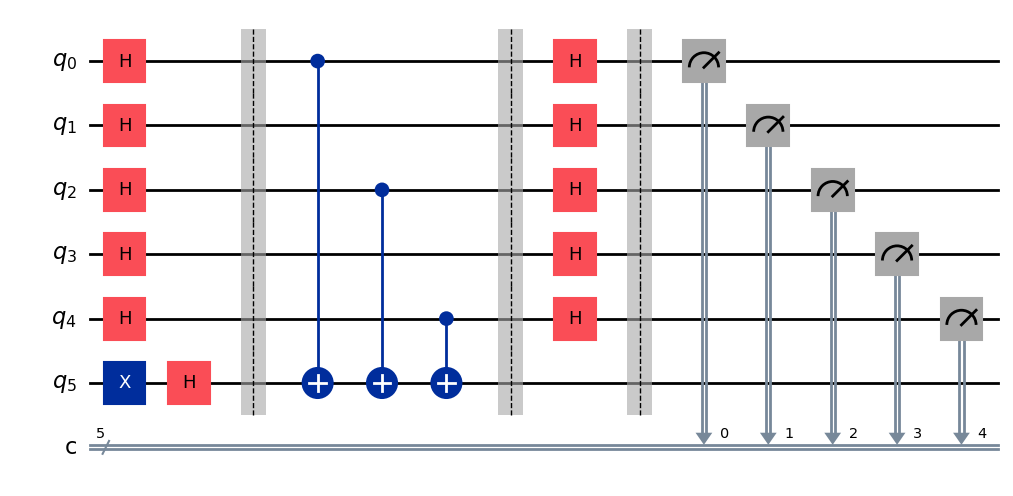

In [4]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index {index} is {one}")
    if one == "1":
        circuit.cx(index, len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))
circuit.barrier()
circuit.measure(range(len(secretNumber)), range(len(secretNumber)))
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(circuit, shots=1)

result = job.result().get_counts()


print(result)


{'10101': 1}
